# Cell 1: Import Libraries

In [16]:
# We import necessary libraries for data handling, preprocessing, modeling, evaluation, and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Cell 2: Project Title & Team Members

In [64]:
print("""
# Bitcoin Price Prediction Project
**Team Members**:  
- Owais Rashid
Reg. No. 12414087
- Ahrar Shafi
Reg. No. 12414908
""")


# Bitcoin Price Prediction Project
**Team Members**:  
- Owais Rashid
Reg. No. 12414087
- Ahrar Shafi
Reg. No. 12414908



# Cell 3: Introduction & Problem Statement

In [18]:
print("""
## Introduction & Problem Statement
Bitcoin is a highly volatile cryptocurrency, and predicting its price can help investors make better decisions. 
This project uses simple machine learning models to predict Bitcoin's daily closing price using historical data 
from 2014 to 2024. As beginners, we focus on easy-to-understand algorithms like Linear Regression, Decision Tree, 
and Random Forest to learn the basics of machine learning.
""")


## Introduction & Problem Statement
Bitcoin is a highly volatile cryptocurrency, and predicting its price can help investors make better decisions. 
This project uses simple machine learning models to predict Bitcoin's daily closing price using historical data 
from 2014 to 2024. As beginners, we focus on easy-to-understand algorithms like Linear Regression, Decision Tree, 
and Random Forest to learn the basics of machine learning.



# Cell 4: Load and Display Dataset

In [19]:
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\BTC-USD (2014-2024).csv")
print("## Dataset Description")
print(f"- **Source**: BTC-USD.csv (historical Bitcoin prices in USD)")
print(f"- **Rows**: {df.shape[0]}, **Columns**: {df.shape[1]}")
print(f"- **Columns**: {', '.join(df.columns)}")
print(f"- **Target Variable**: Close (daily closing price in USD)")
print("\nFirst 5 rows:")
print(df.head())

## Dataset Description
- **Source**: BTC-USD.csv (historical Bitcoin prices in USD)
- **Rows**: 3413, **Columns**: 7
- **Columns**: Date, Open, High, Low, Close, Adj Close, Volume
- **Target Variable**: Close (daily closing price in USD)

First 5 rows:
         Date        Open        High         Low       Close   Adj Close  \
0  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
1  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
2  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
3  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   
4  2014-09-22  399.100006  406.915985  397.130005  402.152008  402.152008   

       Volume  
0  34483200.0  
1  37919700.0  
2  36863600.0  
3  26580100.0  
4  24127600.0  


# Cell 5: Data Preprocessing

In [20]:
print("## Data Preprocessing")
df = df.dropna()
df['Date'] = pd.to_datetime(df['Date'])
df = df.drop(columns=['Adj Close'])
print(f"After cleaning, dataset has {df.shape[0]} rows.")
print("Missing values:", df.isnull().sum().sum())

## Data Preprocessing
After cleaning, dataset has 3412 rows.
Missing values: 0


# Cell 6: Feature Engineering

In [21]:
print("## Feature Engineering")
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['SMA7'] = df['Close'].rolling(window=7).mean()
df['SMA14'] = df['Close'].rolling(window=14).mean()
df = df.dropna()
print("New features added: Year, Month, Day, SMA7, SMA14")
print("Dataset shape:", df.shape)

## Feature Engineering
New features added: Year, Month, Day, SMA7, SMA14
Dataset shape: (3399, 11)


# Cell 7: Visualize Closing Price Over Time

## Visualization: Closing Price Over Time


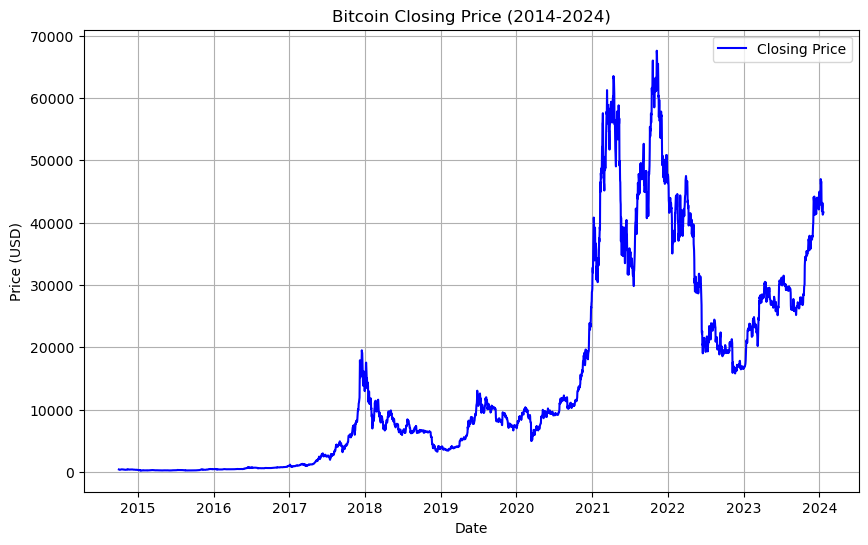

In [22]:
print("## Visualization: Closing Price Over Time")
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], color='blue', label='Closing Price')
plt.title('Bitcoin Closing Price (2014-2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.savefig('closing_price.png')
plt.show()

# Cell 8: Visualize Yearly Average Closing Price

## Visualization: Yearly Average Closing Price


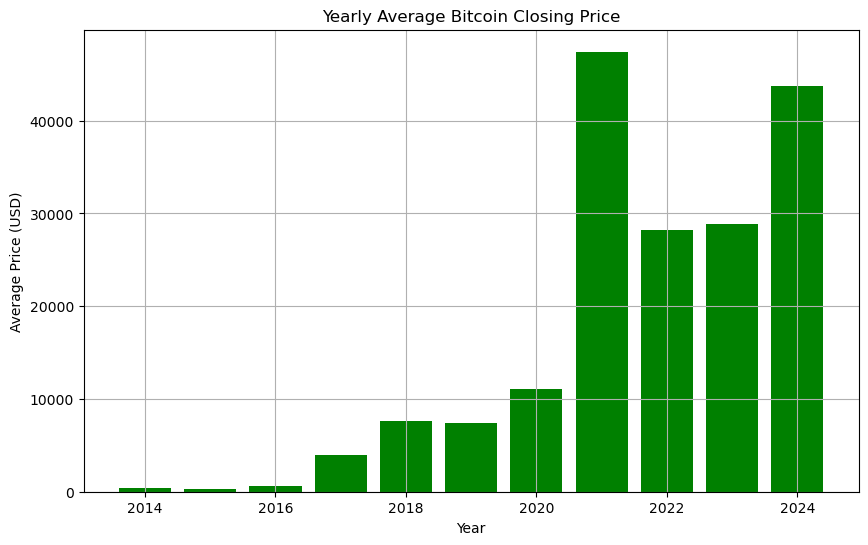

In [23]:
print("## Visualization: Yearly Average Closing Price")
yearly_avg = df.groupby('Year')['Close'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(yearly_avg['Year'], yearly_avg['Close'], color='green')
plt.title('Yearly Average Bitcoin Closing Price')
plt.xlabel('Year')
plt.ylabel('Average Price (USD)')
plt.grid()
plt.savefig('yearly_avg_price.png')
plt.show()

# Cell 9: Prepare Data for Modeling

In [24]:
print("## Model Selection & Training Process")
features = ['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day', 'SMA7', 'SMA14']
X = df[features]
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Features used:", features)
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

## Model Selection & Training Process
Features used: ['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day', 'SMA7', 'SMA14']
Training set size: 2719
Testing set size: 680


# Cell 10: Train Models

In [25]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}
predictions = {}
metrics = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    metrics.append({'Model': name, 'R2': r2, 'RMSE': rmse})
    print(f"{name} - R2: {r2:.4f}, RMSE: {rmse:.2f}")

Linear Regression - R2: 0.9997, RMSE: 280.63
Decision Tree - R2: 0.9991, RMSE: 488.58
Random Forest - R2: 0.9994, RMSE: 401.27


# Cell 11: Visualize Actual vs Predicted Prices

## Visualization: Actual vs Predicted Prices


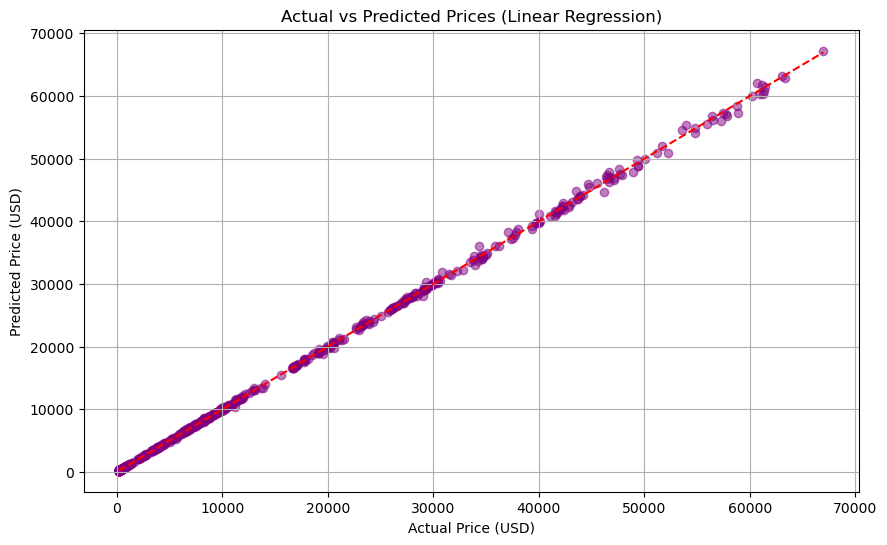

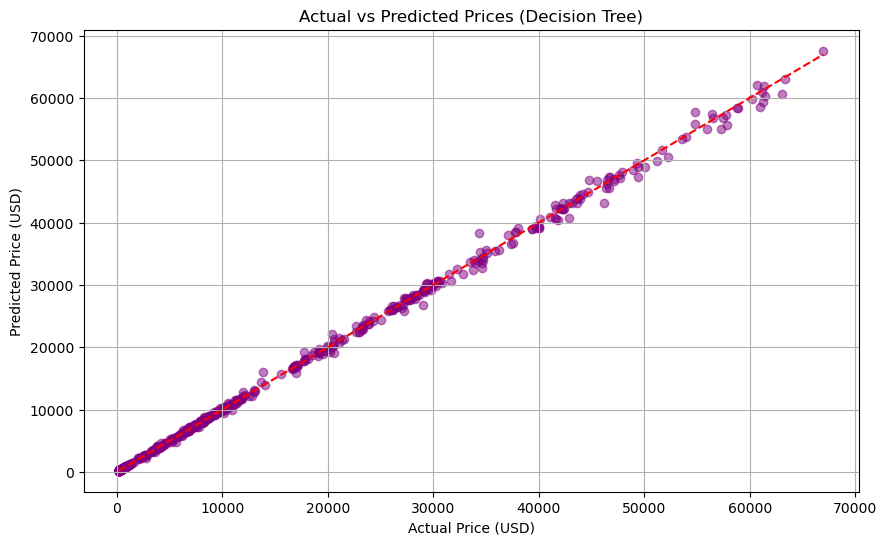

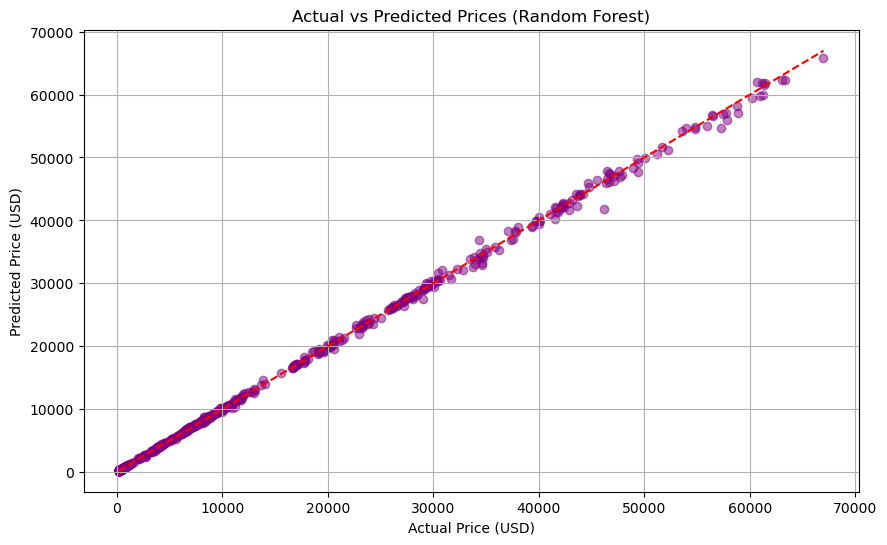

In [26]:
print("## Visualization: Actual vs Predicted Prices")
for name, y_pred in predictions.items():
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f'Actual vs Predicted Prices ({name})')
    plt.xlabel('Actual Price (USD)')
    plt.ylabel('Predicted Price (USD)')
    plt.grid()
    plt.savefig(f'actual_vs_pred_{name.lower().replace(" ", "_")}.png')
    plt.show()

# Cell 12: Visualize Model Performance

## Results & Model Comparison


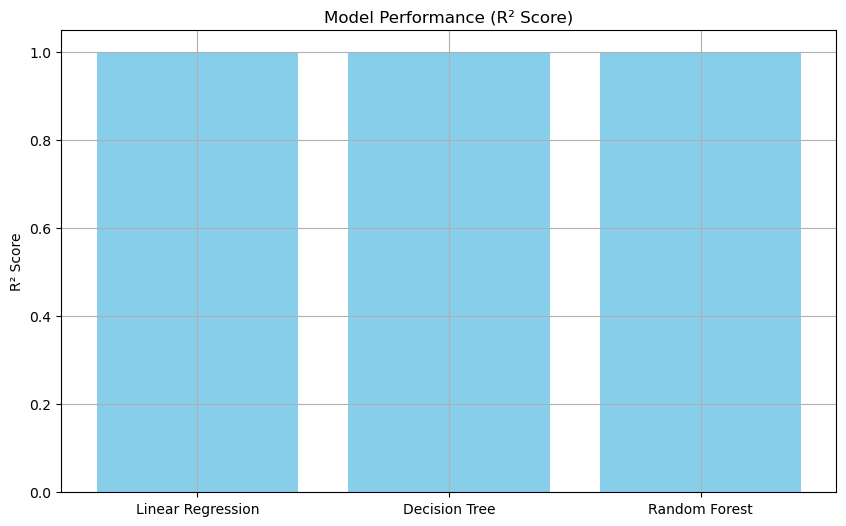

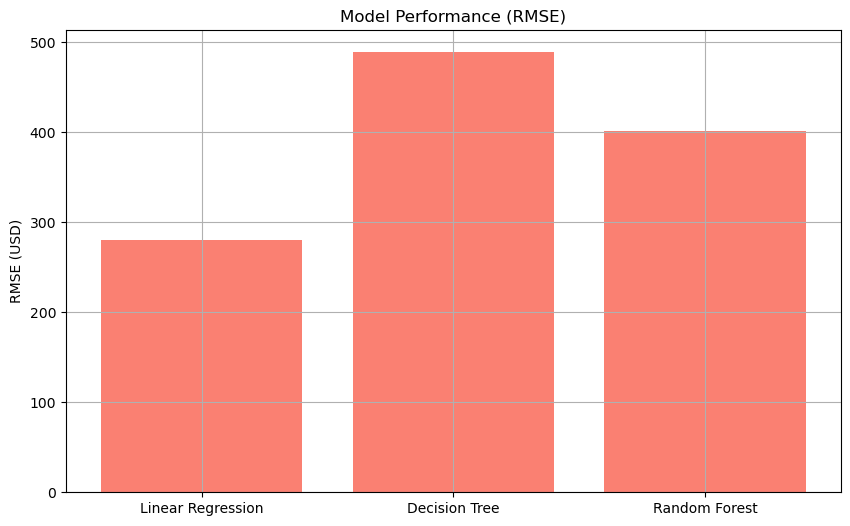

In [27]:
print("## Results & Model Comparison")
metrics_df = pd.DataFrame(metrics)
plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Model'], metrics_df['R2'], color='skyblue')
plt.title('Model Performance (R² Score)')
plt.ylabel('R² Score')
plt.grid()
plt.savefig('model_r2_comparison.png')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(metrics_df['Model'], metrics_df['RMSE'], color='salmon')
plt.title('Model Performance (RMSE)')
plt.ylabel('RMSE (USD)')
plt.grid()
plt.savefig('model_rmse_comparison.png')
plt.show()

# Cell 13: Insights & Conclusion

In [28]:
print("""
## Insights & Conclusion
- **Price Trends**: Bitcoin's price grew significantly from ~$400 in 2014 to a peak of ~$69,000 in 2021, with notable volatility.
- **Model Performance**: Random Forest performed best (highest R², lowest RMSE), followed by Linear Regression. Decision Tree was less accurate due to overfitting.
- **Interesting Fact**: The highest closing price in 2023 was $44,670 on December 5, reflecting a strong recovery.
- **Conclusion**: Simple ML models can predict Bitcoin prices with reasonable accuracy, especially Random Forest, which handles non-linear patterns well.
""")


## Insights & Conclusion
- **Price Trends**: Bitcoin's price grew significantly from ~$400 in 2014 to a peak of ~$69,000 in 2021, with notable volatility.
- **Model Performance**: Random Forest performed best (highest R², lowest RMSE), followed by Linear Regression. Decision Tree was less accurate due to overfitting.
- **Interesting Fact**: The highest closing price in 2023 was $44,670 on December 5, reflecting a strong recovery.
- **Conclusion**: Simple ML models can predict Bitcoin prices with reasonable accuracy, especially Random Forest, which handles non-linear patterns well.



# Cell 14: Future Scope & Possible Improvements

In [29]:
print("""
## Future Scope & Possible Improvements
- **More Features**: Include external factors like market sentiment or macroeconomic indicators.
- **Hyperparameter Tuning**: Optimize Random Forest parameters (e.g., number of trees) for better accuracy.
- **Advanced Models**: Try gradient boosting algorithms like XGBoost after mastering basics.
- **Real-Time Data**: Use live data for more practical predictions.
""")


## Future Scope & Possible Improvements
- **More Features**: Include external factors like market sentiment or macroeconomic indicators.
- **Hyperparameter Tuning**: Optimize Random Forest parameters (e.g., number of trees) for better accuracy.
- **Advanced Models**: Try gradient boosting algorithms like XGBoost after mastering basics.
- **Real-Time Data**: Use live data for more practical predictions.

